This is a second version of Python segmentation, written by Sonia (the other version was written by Christian). Christian's version imports functions from Julia to accomplish image segmentation. This version, however, employs handy code from a well-familiar package: Scikit! This sub-category of Scikit is called Scikit Image.

In [2]:
#Import relevant packages and etc.
import skimage.io as skio
import os
import matplotlib.pyplot as plt
import numpy as np
import skimage.filters as skfilt
import skimage.measure as skmeas
import skimage.segmentation as skseg
from pathlib import Path
import pandas as pd

#Set the location of files
os.chdir('C:\\Users\\se.mpervivum\\Documents\\GitHub\\Math76_FinalProject\\Data\\Sentinel-s001\\RGB')

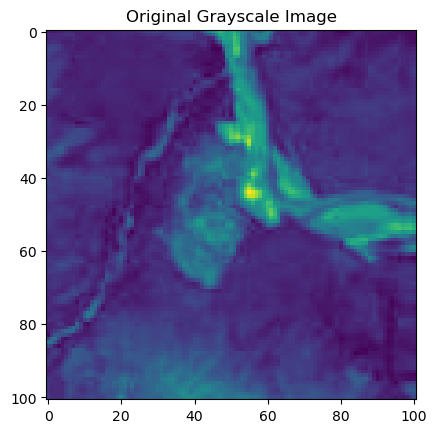

The mean of the JPG image is 0.27740844073341525


In [6]:
#We will check to see that the code works by segmenting a single image. This will serve as the example for all methods used here.

#First, we select an image
testimage = skio.imread("RGB_2020-07-04.JPG", as_gray = True)

#Then, to make sure we have actually got the image, we display the image
#and calculate the mean of the TIF stack (a basic function) and see that it does not return 0.
plt.imshow(testimage)
plt.title("Original Grayscale Image")
#plt.savefig('og.png')
plt.show()
meanpixel = testimage.mean()
print("The mean of the JPG image is " + str(meanpixel))

The total slump area in this image based on a mean threshold is 1880.0


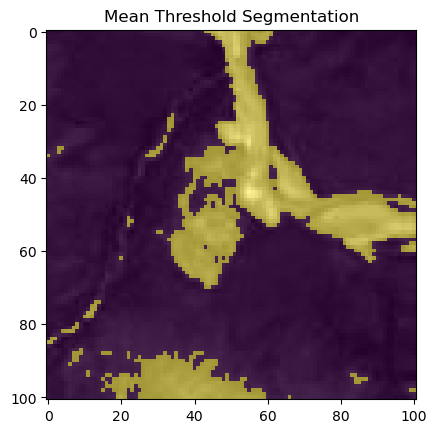

In [10]:
#We will initially segment the images with a basic thresholding mask
meanmasks = testimage > meanpixel*1.25 #Create the mask, selecting only pixels twice as different as the mean
meanmask = np.array(meanmasks, dtype = np.byte) #Convert the mask to byte values 

#Plot the segments
plt.imshow(testimage, cmap = "gray") #Set the cmap to gray
plt.imshow(meanmask, alpha = 0.5) #Overlay the mask on the image with an opacity of 0.5 
plt.title("Mean Threshold Segmentation")
#plt.savefig('mean.png')

#Label the segments found by the program
labels_mean = skmeas.label(meanmask)

#Measure the size of the segments
props_mean = skmeas.regionprops(labels_mean)

#Take the sum of the segment areas
areas_mean = [p.area for p in props_mean]
total_areas_mean = sum(areas_mean)
print("The total slump area in this image based on a mean threshold is " + str(total_areas_mean))

The total slump area in this image based on an automatic threshold is 1821.0


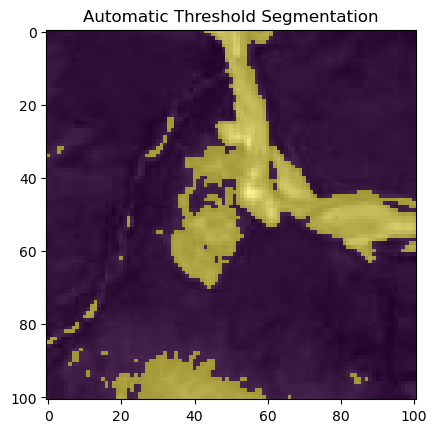

In [12]:
#Next, we can assign an automatic thresholding value rather than a specific number (the mean)
autothresh = skfilt.threshold_otsu(testimage) #Generate threshold
automasks = testimage > autothresh #Create the mask
automask = np.array(automasks, dtype = np.byte) #Convert the mask to byte values

#Plot the segments
plt.imshow(testimage, cmap = "gray") #Set the cmap to gray
plt.imshow(automask, alpha = 0.5) #Overlay the mask on the image with an opacity of 0.5
plt.title("Automatic Threshold Segmentation")
#plt.savefig('auto.png')

#Label the segments found by the program
labels_auto = skmeas.label(automask)

#Measure the size of the segments
props_auto = skmeas.regionprops(labels_auto)

#Take the sum of the segment areas
areas_auto = [p.area for p in props_auto]
total_areas_auto = sum(areas_auto)
print("The total slump area in this image based on an automatic threshold is " + str(total_areas_auto))

In [14]:
#Now, we can take the above "homemade" segmentation methods and make a function out of them, as well as appropriate places to store data
#Reset the directory to include all the data files
os.chdir('C:\\Users\\se.mpervivum\\Documents\\GitHub\\Math76_FinalProject\\Data')

def generate_segmentation(file, image_dates, values_mean, values_auto):
    #First, we select an image
    image = skio.imread(file, as_gray = True)
    
    #Extract the date from the filename
    file_sep = file.split('_')
    date = str(file_sep[1])
    date = date[:-4]
    image_dates.append(date)
    
    #Calculate the mean pixel value in the image
    meanpixel = image.mean()
    
    #We will initially segment the images with a basic thresholding mask
    meanmasks = image > meanpixel*1.25 #Create the mask, selecting only pixels twice as different as the mean
    meanmask = np.array(meanmasks, dtype = np.byte) #Convert the mask to byte values 

    #Label the segments found by the program
    labels_mean = skmeas.label(meanmask)

    #Measure the size of the segments
    props_mean = skmeas.regionprops(labels_mean)

    #Take the sum of the segment areas
    areas_mean = [p.area for p in props_mean]
    total_areas_mean = sum(areas_mean)
    values_mean.append(total_areas_mean)
    
    #Next, we can assign an automatic thresholding value rather than a specific number (the mean)
    autothresh = skfilt.threshold_otsu(image) #Generate threshold
    automasks = testimage > autothresh #Create the mask
    automask = np.array(automasks, dtype = np.byte) #Convert the mask to byte values

    #Label the segments found by the program
    labels_auto = skmeas.label(automask)

    #Measure the size of the segments
    props_auto = skmeas.regionprops(labels_auto)

    #Take the sum of the segment areas
    areas_auto = [p.area for p in props_auto]
    total_areas_auto = sum(areas_auto)
    values_auto.append(total_areas_auto)

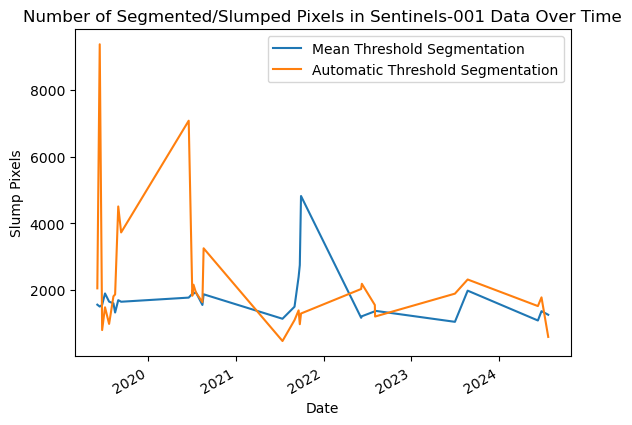

In [18]:
#Run the above function to collect data on Sentinel-s001

#Create empty lists to hold the output
Sentinels001_image_dates = []
Sentinels001_values_mean = []
Sentinels001_values_auto = []

#Run the function for every file in this folder
dir = Path('Sentinel-s001/RGB')
for filename in dir.glob('*.jpg'):
    file = str(filename)
    generate_segmentation(file, Sentinels001_image_dates, Sentinels001_values_mean, Sentinels001_values_auto)

#Make sure the dates are recognizable as timecourse data
Sentinels001_image_dates = pd.to_datetime(Sentinels001_image_dates)

#Create dataframe to hold the output
Sentinels001_data = pd.DataFrame()
Sentinels001_data['values_mean'] = Sentinels001_values_mean
Sentinels001_data['values_auto'] = Sentinels001_values_auto

Sentinels001_data = Sentinels001_data.set_index(Sentinels001_image_dates)
plt.plot(Sentinels001_data['values_mean'], label = 'Mean Threshold Segmentation')
plt.plot(Sentinels001_data['values_auto'], label = 'Automatic Threshold Segmentation')
plt.title("Number of Segmented/Slumped Pixels in Sentinels-001 Data Over Time")
plt.xlabel("Date")
plt.ylabel("Slump Pixels")
plt.legend()
plt.gcf().autofmt_xdate()
#plt.savefig('001.png')
plt.show()

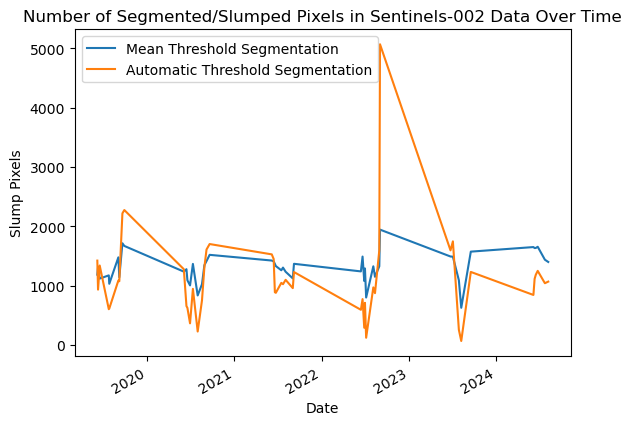

In [20]:
#Run the above function to collect data on Sentinel-s002

#Create empty lists to hold the output
Sentinels002_image_dates = []
Sentinels002_values_mean = []
Sentinels002_values_auto = []

#Run the function for every file in this folder
dir = Path('Sentinel-s002/RGB')
for filename in dir.glob('*.jpg'):
    file = str(filename)
    generate_segmentation(file, Sentinels002_image_dates, Sentinels002_values_mean, Sentinels002_values_auto)

#Make sure the dates are recognizable as timecourse data
Sentinels002_image_dates = pd.to_datetime(Sentinels002_image_dates)

#Create dataframe to hold the output
Sentinels002_data = pd.DataFrame()
Sentinels002_data['values_mean'] = Sentinels002_values_mean
Sentinels002_data['values_auto'] = Sentinels002_values_auto

Sentinels002_data = Sentinels002_data.set_index(Sentinels002_image_dates)
plt.plot(Sentinels002_data['values_mean'], label = 'Mean Threshold Segmentation')
plt.plot(Sentinels002_data['values_auto'], label = 'Automatic Threshold Segmentation')
plt.title("Number of Segmented/Slumped Pixels in Sentinels-002 Data Over Time")
plt.xlabel("Date")
plt.ylabel("Slump Pixels")
plt.legend()
plt.gcf().autofmt_xdate()
#plt.savefig('002.png')
plt.show()

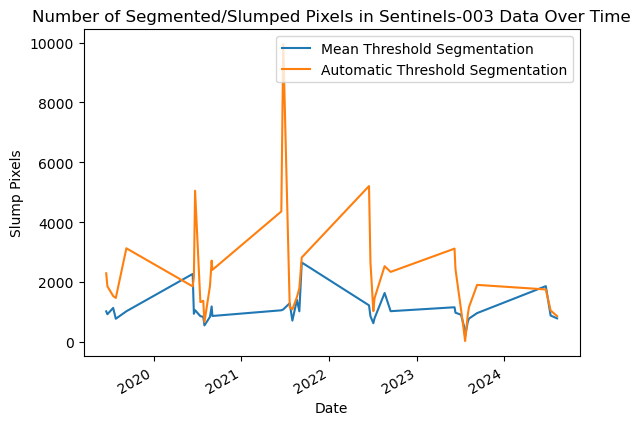

In [22]:
#Run the above function to collect data on Sentinel-s003

#Create empty lists to hold the output
Sentinels003_image_dates = []
Sentinels003_values_mean = []
Sentinels003_values_auto = []

#Run the function for every file in this folder
dir = Path('Sentinel-s003/RGB')
for filename in dir.glob('*.jpg'):
    file = str(filename)
    generate_segmentation(file, Sentinels003_image_dates, Sentinels003_values_mean, Sentinels003_values_auto)

#Make sure the dates are recognizable as timecourse data
Sentinels003_image_dates = pd.to_datetime(Sentinels003_image_dates)

#Create dataframe to hold the output
Sentinels003_data = pd.DataFrame()
Sentinels003_data['values_mean'] = Sentinels003_values_mean
Sentinels003_data['values_auto'] = Sentinels003_values_auto

Sentinels003_data = Sentinels003_data.set_index(Sentinels003_image_dates)
plt.plot(Sentinels003_data['values_mean'], label = 'Mean Threshold Segmentation')
plt.plot(Sentinels003_data['values_auto'], label = 'Automatic Threshold Segmentation')
plt.title("Number of Segmented/Slumped Pixels in Sentinels-003 Data Over Time")
plt.xlabel("Date")
plt.ylabel("Slump Pixels")
plt.legend()
plt.gcf().autofmt_xdate()
#plt.savefig('003.png')
plt.show()

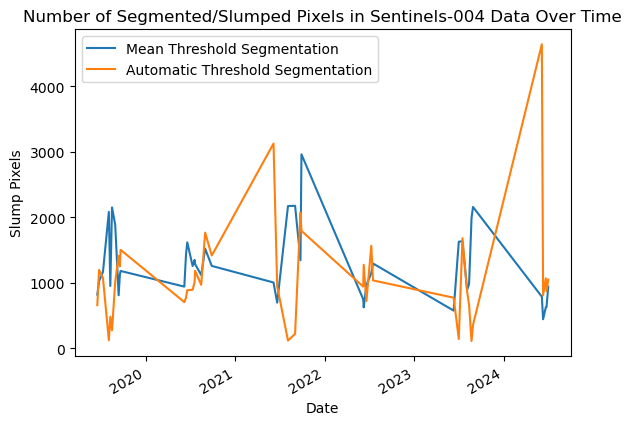

In [24]:
#Run the above function to collect data on Sentinel-s004

#Create empty lists to hold the output
Sentinels004_image_dates = []
Sentinels004_values_mean = []
Sentinels004_values_auto = []

#Run the function for every file in this folder
dir = Path('Sentinel-s004/RGB')
for filename in dir.glob('*.jpg'):
    file = str(filename)
    generate_segmentation(file, Sentinels004_image_dates, Sentinels004_values_mean, Sentinels004_values_auto)

#Make sure the dates are recognizable as timecourse data
Sentinels004_image_dates = pd.to_datetime(Sentinels004_image_dates)

#Create dataframe to hold the output
Sentinels004_data = pd.DataFrame()
Sentinels004_data['values_mean'] = Sentinels004_values_mean
Sentinels004_data['values_auto'] = Sentinels004_values_auto

Sentinels004_data = Sentinels004_data.set_index(Sentinels004_image_dates)
plt.plot(Sentinels004_data['values_mean'], label = 'Mean Threshold Segmentation')
plt.plot(Sentinels004_data['values_auto'], label = 'Automatic Threshold Segmentation')
plt.title("Number of Segmented/Slumped Pixels in Sentinels-004 Data Over Time")
plt.xlabel("Date")
plt.ylabel("Slump Pixels")
plt.legend()
plt.gcf().autofmt_xdate()
#plt.savefig('004.png')
plt.show()

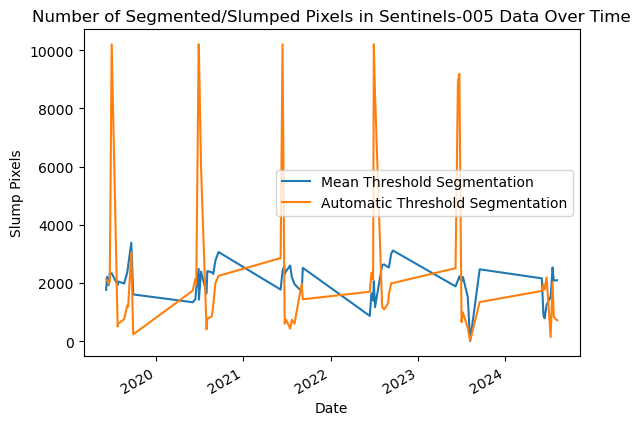

In [26]:
#Run the above function to collect data on Sentinel-s005

#Create empty lists to hold the output
Sentinels005_image_dates = []
Sentinels005_values_mean = []
Sentinels005_values_auto = []

#Run the function for every file in this folder
dir = Path('Sentinel-s005/RGB')
for filename in dir.glob('*.jpg'):
    file = str(filename)
    generate_segmentation(file, Sentinels005_image_dates, Sentinels005_values_mean, Sentinels005_values_auto)

#Make sure the dates are recognizable as timecourse data
Sentinels005_image_dates = pd.to_datetime(Sentinels005_image_dates)

#Create dataframe to hold the output
Sentinels005_data = pd.DataFrame()
Sentinels005_data['values_mean'] = Sentinels005_values_mean
Sentinels005_data['values_auto'] = Sentinels005_values_auto

Sentinels005_data = Sentinels005_data.set_index(Sentinels005_image_dates)
plt.plot(Sentinels005_data['values_mean'], label = 'Mean Threshold Segmentation')
plt.plot(Sentinels005_data['values_auto'], label = 'Automatic Threshold Segmentation')
plt.title("Number of Segmented/Slumped Pixels in Sentinels-005 Data Over Time")
plt.xlabel("Date")
plt.ylabel("Slump Pixels")
plt.legend()
plt.gcf().autofmt_xdate()
#plt.savefig('005.png')
plt.show()

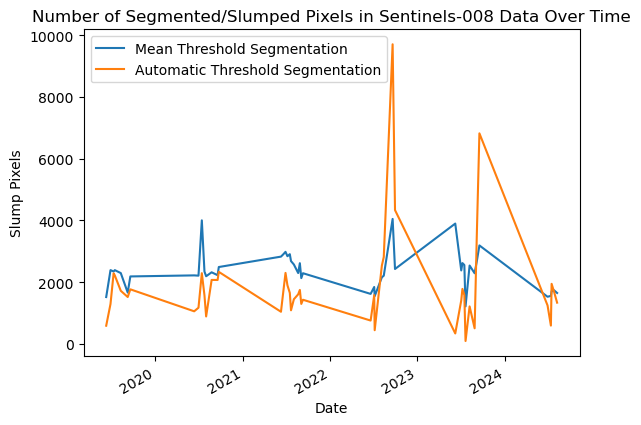

In [28]:
#Run the above function to collect data on Sentinel-s008

#Create empty lists to hold the output
Sentinels008_image_dates = []
Sentinels008_values_mean = []
Sentinels008_values_auto = []

#Run the function for every file in this folder
dir = Path('Sentinel-s008/RGB')
for filename in dir.glob('*.jpg'):
    file = str(filename)
    generate_segmentation(file, Sentinels008_image_dates, Sentinels008_values_mean, Sentinels008_values_auto)

#Make sure the dates are recognizable as timecourse data
Sentinels008_image_dates = pd.to_datetime(Sentinels008_image_dates)

#Create dataframe to hold the output
Sentinels008_data = pd.DataFrame()
Sentinels008_data['values_mean'] = Sentinels008_values_mean
Sentinels008_data['values_auto'] = Sentinels008_values_auto

Sentinels008_data = Sentinels008_data.set_index(Sentinels008_image_dates)
plt.plot(Sentinels008_data['values_mean'], label = 'Mean Threshold Segmentation')
plt.plot(Sentinels008_data['values_auto'], label = 'Automatic Threshold Segmentation')
plt.title("Number of Segmented/Slumped Pixels in Sentinels-008 Data Over Time")
plt.xlabel("Date")
plt.ylabel("Slump Pixels")
plt.legend()
plt.gcf().autofmt_xdate()
#plt.savefig('008.png')
plt.show()

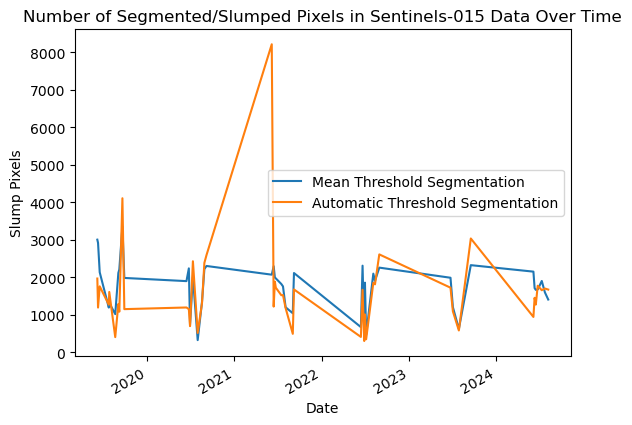

In [30]:
#Run the above function to collect data on Sentinel-s015

#Create empty lists to hold the output
Sentinels015_image_dates = []
Sentinels015_values_mean = []
Sentinels015_values_auto = []

#Run the function for every file in this folder
dir = Path('Sentinel-s015/RGB')
for filename in dir.glob('*.jpg'):
    file = str(filename)
    generate_segmentation(file, Sentinels015_image_dates, Sentinels015_values_mean, Sentinels015_values_auto)

#Make sure the dates are recognizable as timecourse data
Sentinels015_image_dates = pd.to_datetime(Sentinels015_image_dates)

#Create dataframe to hold the output
Sentinels015_data = pd.DataFrame()
Sentinels015_data['values_mean'] = Sentinels015_values_mean
Sentinels015_data['values_auto'] = Sentinels015_values_auto

Sentinels015_data = Sentinels015_data.set_index(Sentinels015_image_dates)
plt.plot(Sentinels015_data['values_mean'], label = 'Mean Threshold Segmentation')
plt.plot(Sentinels015_data['values_auto'], label = 'Automatic Threshold Segmentation')
plt.title("Number of Segmented/Slumped Pixels in Sentinels-015 Data Over Time")
plt.xlabel("Date")
plt.ylabel("Slump Pixels")
plt.legend()
plt.gcf().autofmt_xdate()
#plt.savefig('015.png')
plt.show()

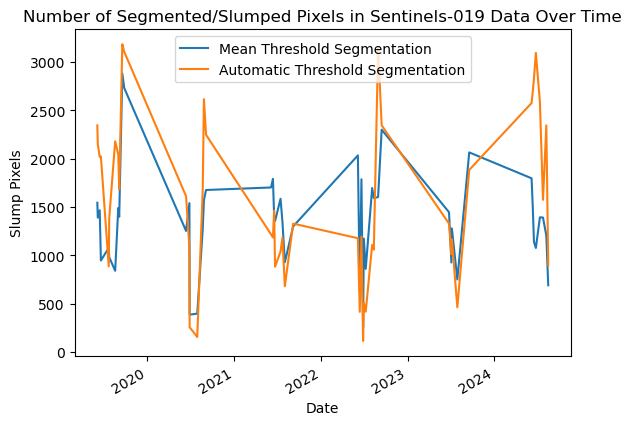

In [32]:
#Run the above function to collect data on Sentinel-s019

#Create empty lists to hold the output
Sentinels019_image_dates = []
Sentinels019_values_mean = []
Sentinels019_values_auto = []

#Run the function for every file in this folder
dir = Path('Sentinel-s019/RGB')
for filename in dir.glob('*.jpg'):
    file = str(filename)
    generate_segmentation(file, Sentinels019_image_dates, Sentinels019_values_mean, Sentinels019_values_auto)

#Make sure the dates are recognizable as timecourse data
Sentinels019_image_dates = pd.to_datetime(Sentinels019_image_dates)

#Create dataframe to hold the output
Sentinels019_data = pd.DataFrame()
Sentinels019_data['values_mean'] = Sentinels019_values_mean
Sentinels019_data['values_auto'] = Sentinels019_values_auto

Sentinels019_data = Sentinels019_data.set_index(Sentinels019_image_dates)
plt.plot(Sentinels019_data['values_mean'], label = 'Mean Threshold Segmentation')
plt.plot(Sentinels019_data['values_auto'], label = 'Automatic Threshold Segmentation')
plt.title("Number of Segmented/Slumped Pixels in Sentinels-019 Data Over Time")
plt.xlabel("Date")
plt.ylabel("Slump Pixels")
plt.legend()
plt.gcf().autofmt_xdate()
#plt.savefig('019.png')
plt.show()